# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended contennt.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit each url and take a look at its source through Chrome DevTools. You'll need to identify the html tags, special class names etc. used for the html content you are expected to extract.

- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide) documentation 
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are imported for you. If you prefer to use additional libraries feel free to uncomment them.

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
from pprint import pprint
%pip install lxml
from lxml import html
from lxml.html import fromstring
import urllib.request
from urllib.request import urlopen
import random
import re
# %pip install scrapy
import scrapy
import feedparser 
import pandas as pd

#% pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By


Note: you may need to restart the kernel to use updated packages.


#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [2]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [3]:
#code with bs
html = req.get(url).text
sopa = bs(html, 'html.parser')
sopa


<!DOCTYPE html>

<html data-a11y-animated-images="system" data-a11y-link-underlines="true" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-0eace2597ca3.css" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-a167e256da9c.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/

In [4]:
#code with selenium 
driver = webdriver.Safari()
url = 'https://github.com/trending/developers'
driver.get(url)
tarjetas = driver.find_elements(By.CSS_SELECTOR, 'div.col-md-6')


In [5]:
len(tarjetas[::2])

25

In [6]:
tarjetas[0].find_element(By.TAG_NAME, 'h1').text.strip('  \n')

'Emil Ernerfeldt'

In [7]:
tarjetas[0].find_element(By.TAG_NAME, 'p').text.strip('  \n')

'emilk'

In [8]:
driver.implicitly_wait(10)
tarjetas = driver.find_elements(By.CSS_SELECTOR, 'div.d-sm-flex.flex-auto > div.col-sm-8.d-md-flex > div:nth-child(1)')

In [9]:
res = []


for t in tarjetas:
    
    nombre = t.find_element(By.TAG_NAME, 'h1').text.strip('  \n')
    
    try:
        nick = t.find_element(By.TAG_NAME, 'p').text.strip('  \n')
    except:
        nick = ''
        
        
    dictio = {'nombre': nombre, 'nick': nick}
    
    
    res.append(dictio)
    
res

[{'nombre': 'Emil Ernerfeldt', 'nick': 'emilk'},
 {'nombre': 'Robert Brennan', 'nick': 'rbren'},
 {'nombre': 'oobabooga', 'nick': ''},
 {'nombre': 'Florian Rival', 'nick': '4ian'},
 {'nombre': 'Fons van der Plas', 'nick': 'fonsp'},
 {'nombre': 'Jarred Sumner', 'nick': 'Jarred-Sumner'},
 {'nombre': 'Lucain', 'nick': 'Wauplin'},
 {'nombre': 'Andreas Thomas', 'nick': 'chronark'},
 {'nombre': 'Kyle Barron', 'nick': 'kylebarron'},
 {'nombre': 'Bob Nystrom', 'nick': 'munificent'},
 {'nombre': 'Kailash Nadh', 'nick': 'knadh'},
 {'nombre': 'Rich Harris', 'nick': 'Rich-Harris'},
 {'nombre': 'Sebastian Raschka', 'nick': 'rasbt'},
 {'nombre': 'Brace Sproul', 'nick': 'bracesproul'},
 {'nombre': 'Ha Thach', 'nick': 'hathach'},
 {'nombre': '三咲雅 · Misaki Masa', 'nick': 'sxyazi'},
 {'nombre': 'Luca Palmieri', 'nick': 'LukeMathWalker'},
 {'nombre': 'jdx', 'nick': ''},
 {'nombre': 'Michael Chris Lopez', 'nick': 'mcchrish'},
 {'nombre': 'Brad Fitzpatrick', 'nick': 'bradfitz'},
 {'nombre': 'Quinn Slack', 

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [10]:
#code with bs
tarjetas = sopa.find_all('div', {'class': 'col-md-6'})
tarjetas[0]

<div class="col-md-6">
<h1 class="h3 lh-condensed">
<a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":1148717,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="7f87bfdd30084fffd05911d217b92b80888d757af0891ad4fe294977cc7c744d" data-view-component="true" href="/emilk">
            Emil Ernerfeldt
</a> </h1>
<p class="f4 text-normal mb-1">
<a class="Link--secondary Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":1148717,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="7f87bfdd30084fffd05911d217b92b80888d757af0891ad4fe294977cc7c744d" data-view-component="true" href

In [11]:
nombre = tarjetas[0].find('h1').text.strip()

nombre

'Emil Ernerfeldt'

In [12]:
nick = tarjetas[0].find('p').text.strip()

nick

'emilk'

In [13]:
f'{nombre}({nick})'

'Emil Ernerfeldt(emilk)'

In [14]:
res = []

for t in tarjetas:
    
    try:
    
        nombre = t.find('h1').text.strip()

        nick = t.find('p').text.strip() if t.find('p') else ''

        completo = f'{nombre}({nick})'

        res.append(completo)
        
    except:
        print(t)

<div class="col-md-6">
<div class="f5 color-fg-muted my-2 my-md-0">
<p class="mb-3 d-flex flex-items-center">
<svg aria-hidden="true" class="octicon octicon-location color-fg-muted mr-2" data-view-component="true" height="16" version="1.1" viewbox="0 0 16 16" width="16">
<path d="m12.596 11.596-3.535 3.536a1.5 1.5 0 0 1-2.122 0l-3.535-3.536a6.5 6.5 0 1 1 9.192-9.193 6.5 6.5 0 0 1 0 9.193Zm-1.06-8.132v-.001a5 5 0 1 0-7.072 7.072L8 14.07l3.536-3.534a5 5 0 0 0 0-7.072ZM8 9a2 2 0 1 1-.001-3.999A2 2 0 0 1 8 9Z"></path>
</svg>
<span class="sr-only">Is from UK</span>
<span class="Truncate">
<span aria-hidden="true" class="Truncate-text">UK</span>
</span>
</p>
</div>
</div>


In [15]:
res

['Emil Ernerfeldt(emilk)',
 'egui()',
 'Robert Brennan(rbren)',
 'rss-parser()',
 'oobabooga()',
 'text-generation-webui()',
 'Florian Rival(4ian)',
 'GDevelop()',
 'Fons van der Plas(fonsp)',
 'Pluto.jl()',
 'Jarred Sumner(Jarred-Sumner)',
 'maxrss()',
 'Lucain(Wauplin)',
 'datasets()',
 'Andreas Thomas(chronark)',
 'highstorm()',
 'Kyle Barron(kylebarron)',
 'geo-index()',
 'Bob Nystrom(munificent)',
 'craftinginterpreters()',
 'Kailash Nadh(knadh)',
 'listmonk()',
 'Rich Harris(Rich-Harris)',
 'degit()',
 'Sebastian Raschka(rasbt)',
 'LLMs-from-scratch()',
 'Brace Sproul(bracesproul)',
 'langtool-template()',
 'Ha Thach(hathach)',
 'tinyusb()',
 '三咲雅 · Misaki Masa(sxyazi)',
 'yazi()',
 'Luca Palmieri(LukeMathWalker)',
 'zero-to-production()',
 'jdx()',
 'mise()',
 'Michael Chris Lopez(mcchrish)',
 'zenbones.nvim()',
 'Brad Fitzpatrick(bradfitz)',
 'gomemcache()',
 'Quinn Slack(sqs)',
 'goreturns()',
 'Michael Davis(the-mikedavis)',
 'helix()',
 'Joel Challis(zvecr)',
 'Eric Traut(er

In [16]:
len(res)

49

In [17]:
len(sopa.find_all('h1', {'class': 'h3 lh-condensed'}))

25

In [18]:
sopa.find_all('h1', {'class': 'h3 lh-condensed'})[0].text.strip()

'Emil Ernerfeldt'

In [19]:
[e.text.strip() for e in sopa.find_all('h1', {'class': 'h3 lh-condensed'})]

['Emil Ernerfeldt',
 'Robert Brennan',
 'oobabooga',
 'Florian Rival',
 'Fons van der Plas',
 'Jarred Sumner',
 'Lucain',
 'Andreas Thomas',
 'Kyle Barron',
 'Bob Nystrom',
 'Kailash Nadh',
 'Rich Harris',
 'Sebastian Raschka',
 'Brace Sproul',
 'Ha Thach',
 '三咲雅 · Misaki Masa',
 'Luca Palmieri',
 'jdx',
 'Michael Chris Lopez',
 'Brad Fitzpatrick',
 'Quinn Slack',
 'Michael Davis',
 'Joel Challis',
 'Eric Traut',
 'Azure SDK Bot']

In [20]:
len(sopa.find_all('p', {'class': 'f4 text-normal mb-1'}))

23

In [21]:
[e.text.strip() for e in sopa.find_all('p', {'class': 'f4 text-normal mb-1'})]

['emilk',
 'rbren',
 '4ian',
 'fonsp',
 'Jarred-Sumner',
 'Wauplin',
 'chronark',
 'kylebarron',
 'munificent',
 'knadh',
 'Rich-Harris',
 'rasbt',
 'bracesproul',
 'hathach',
 'sxyazi',
 'LukeMathWalker',
 'mcchrish',
 'bradfitz',
 'sqs',
 'the-mikedavis',
 'zvecr',
 'erictraut',
 'azure-sdk']

In [22]:
res = []

for i in range(0, len(tarjetas), 2):  
    

    
    nombre = tarjetas[i].find('h1').text.strip()
    
    
    nick = tarjetas[i].find('p').text.strip() if tarjetas[i].find('p') else ''

    completo = f'{nombre}({nick})'

    res.append(completo)

In [23]:
res

['Emil Ernerfeldt(emilk)',
 'Robert Brennan(rbren)',
 'oobabooga()',
 'Florian Rival(4ian)',
 'Fons van der Plas(fonsp)',
 'Jarred Sumner(Jarred-Sumner)',
 'Lucain(Wauplin)',
 'Andreas Thomas(chronark)',
 'Kyle Barron(kylebarron)',
 'Bob Nystrom(munificent)',
 'Kailash Nadh(knadh)',
 'Rich Harris(Rich-Harris)',
 'Sebastian Raschka(rasbt)',
 'Brace Sproul(bracesproul)',
 'Ha Thach(hathach)',
 '三咲雅 · Misaki Masa(sxyazi)',
 'Luca Palmieri(LukeMathWalker)',
 'jdx()',
 'Michael Chris Lopez(mcchrish)',
 'Brad Fitzpatrick(bradfitz)',
 'Quinn Slack(sqs)',
 'Michael Davis(the-mikedavis)',
 'Joel Challis(zvecr)',
 'Eric Traut(erictraut)',
 'Azure SDK Bot(azure-sdk)']

In [24]:
len(res)

25

#### Display the trending Python repositories in GitHub

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [25]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/python?since=daily'

In [26]:
#your code
html = req.get(url).text

sopa = bs(html, 'html.parser')

In [27]:
tarjetas = sopa.find_all('h2', {'class': 'h3 lh-condensed'})

In [28]:
tarjetas[0]

<h2 class="h3 lh-condensed">
<a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_REPOSITORIES_PAGE","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":775873810,"originating_url":"https://github.com/trending/python?since=daily","user_id":null}}' data-hydro-click-hmac="1ea879ea9b680f984946ed46f5aa730be5c247e86fb0aa10d0ae8b1893d8425f" data-view-component="true" href="/Zejun-Yang/AniPortrait">
<svg aria-hidden="true" class="octicon octicon-repo mr-1 color-fg-muted" data-view-component="true" height="16" version="1.1" viewbox="0 0 16 16" width="16">
<path d="M2 2.5A2.5 2.5 0 0 1 4.5 0h8.75a.75.75 0 0 1 .75.75v12.5a.75.75 0 0 1-.75.75h-2.5a.75.75 0 0 1 0-1.5h1.75v-2h-8a1 1 0 0 0-.714 1.7.75.75 0 1 1-1.072 1.05A2.495 2.495 0 0 1 2 11.5Zm10.5-1h-8a1 1 0 0 0-1 1v6.708A2.486 2.486 0 0 1 4.5 9h8ZM5 12.25a.25.25 0 0 1 .25-.25h3.5a.25.25 0 0 1 .25.25v3.25a.25.25 0 0 1-.4.2l-1.45-1.087a.249

In [29]:
tarjetas[0].text.strip().replace('\n\n     ', '')

'Zejun-Yang / AniPortrait'

In [30]:
res = []

for t in tarjetas:
    
    dato = t.text.strip().replace('\n\n     ', '')
    
    res.append(dato)
    
res

['Zejun-Yang / AniPortrait',
 'MsLolita / grass',
 'TencentARC / BrushNet',
 'tiangolo / typer',
 'sympy / sympy',
 'donnemartin / system-design-primer',
 'agiresearch / AIOS',
 'harry0703 / MoneyPrinterTurbo',
 'xtekky / gpt4free',
 'RVC-Project / Retrieval-based-Voice-Conversion-WebUI',
 'blakeblackshear / frigate',
 'MsLolita / backpack-volume-auto',
 'myshell-ai / OpenVoice',
 'mxrch / GHunt',
 'TMElyralab / MuseV',
 'public-apis / public-apis',
 'brilliantlabsAR / noa-assistant',
 'karpathy / nanoGPT',
 'SunoAI-API / Suno-API',
 'Lightning-AI / litgpt',
 'joaomdmoura / crewAI',
 'foivospar / Arc2Face',
 'ManimCommunity / manim',
 'yt-dlp / yt-dlp',
 'RsaCtfTool / RsaCtfTool']

In [31]:
len(res)

25

In [49]:
# code with selenium

driver = webdriver.Safari()
url = 'https://github.com/trending/python?since=daily'
driver.get(url)
driver.implicitly_wait(10)
tarjetas = driver.find_elements(By.CSS_SELECTOR, 'h2.h3.lh-condensed')

In [50]:
len(tarjetas)

25

In [52]:
tarjetas[0].text.strip()

'Zejun-Yang /\n\n      AniPortrait'

In [53]:
tarjetas[0].text.strip().split('/\n\n      ')[0] + '(' + tarjetas[0].text.strip().split('/\n\n      ')[1] + ')'

'Zejun-Yang (AniPortrait)'

In [54]:
res = []


for t in tarjetas:
    
    res.append(t.text.strip().split('/\n\n      ')[0] + '(' + t.text.strip().split('/\n\n      ')[1] + ')')
    
res

['Zejun-Yang (AniPortrait)',
 'MsLolita (grass)',
 'TencentARC (BrushNet)',
 'tiangolo (typer)',
 'sympy (sympy)',
 'donnemartin (system-design-primer)',
 'agiresearch (AIOS)',
 'harry0703 (MoneyPrinterTurbo)',
 'xtekky (gpt4free)',
 'RVC-Project (Retrieval-based-Voice-Conversion-WebUI)',
 'blakeblackshear (frigate)',
 'MsLolita (backpack-volume-auto)',
 'myshell-ai (OpenVoice)',
 'mxrch (GHunt)',
 'TMElyralab (MuseV)',
 'public-apis (public-apis)',
 'brilliantlabsAR (noa-assistant)',
 'karpathy (nanoGPT)',
 'SunoAI-API (Suno-API)',
 'Lightning-AI (litgpt)',
 'joaomdmoura (crewAI)',
 'foivospar (Arc2Face)',
 'ManimCommunity (manim)',
 'yt-dlp (yt-dlp)',
 'RsaCtfTool (RsaCtfTool)']

#### Display all the image links from Walt Disney wikipedia page

In [55]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'

In [56]:
#your code
html = req.get(url).text
sopa = bs(html, 'html.parser')
sopa

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Walt Disney - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-fea

In [57]:
sopa.find_all('img')[0].attrs['src']

'/static/images/icons/wikipedia.png'

In [58]:
[e.attrs['src'] for e in sopa.find_all('img')]

['/static/images/icons/wikipedia.png',
 '/static/images/mobile/copyright/wikipedia-wordmark-en.svg',
 '/static/images/mobile/copyright/wikipedia-tagline-en.svg',
 '//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/8/8c/Extended-protection-shackle.svg/20px-Extended-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/220px-Walt_Disney_1946.JPG',
 '//upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/150px-Walt_Disney_1942_signature.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/220px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-Walt_Disney_envelope_ca._1921.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Walt_Disney_Snow_w

In [65]:
# code with selenium 
driver = webdriver.Safari()
url = 'https://en.wikipedia.org/wiki/Walt_Disney'
driver.get(url)

In [66]:
images = driver.find_elements(By.TAG_NAME, 'img')
images[0].get_attribute('src')

'https://en.wikipedia.org/static/images/icons/wikipedia.png'

In [67]:
res = []

for e in images:
    
    img_url = e.get_attribute('src')
    
    if img_url.startswith('https:'):
        
        res.append(img_url)
        
res

['https://en.wikipedia.org/static/images/icons/wikipedia.png',
 'https://en.wikipedia.org/static/images/mobile/copyright/wikipedia-wordmark-en.svg',
 'https://en.wikipedia.org/static/images/mobile/copyright/wikipedia-tagline-en.svg',
 'https://upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png',
 'https://upload.wikimedia.org/wikipedia/en/thumb/8/8c/Extended-protection-shackle.svg/20px-Extended-protection-shackle.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/220px-Walt_Disney_1946.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/150px-Walt_Disney_1942_signature.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/220px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page

In [68]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Python' 

In [69]:
#your code
html = req.get(url).text

sopa = bs(html, 'html.parser')
sopa

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Python - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-

In [70]:
aes = sopa.find_all('a')

In [71]:
aes

[<a class="mw-jump-link" href="#bodyContent">Jump to content</a>,
 <a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>,
 <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>,
 <a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a>,
 <a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a>,
 <a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a>,
 <a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a>,
 <a href="https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&amp;utm_medium=sidebar&amp;utm_campaign=C13_en.wikipedia.org&amp;uselang=en" title="Support us by donating to the Wikimedia Foundation"><span>Donate</span></a>,
 <a href=

In [72]:
aes[0].text

'Jump to content'

In [73]:
aes[0].attrs['href']

'#bodyContent'

In [74]:
res = []

for a in aes:
    
    if 'https' in a.attrs['href']:
        
        res.append(a.attrs['href'])
    
    
res

['https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en',
 'https://af.wikipedia.org/wiki/Python',
 'https://als.wikipedia.org/wiki/Python',
 'https://ar.wikipedia.org/wiki/%D8%A8%D8%A7%D9%8A%D8%AB%D9%88%D9%86_(%D8%AA%D9%88%D8%B6%D9%8A%D8%AD)',
 'https://az.wikipedia.org/wiki/Python_(d%C9%99qiql%C9%99%C5%9Fdirm%C9%99)',
 'https://bn.wikipedia.org/wiki/%E0%A6%AA%E0%A6%BE%E0%A6%87%E0%A6%A5%E0%A6%A8_(%E0%A6%A6%E0%A7%8D%E0%A6%AC%E0%A7%8D%E0%A6%AF%E0%A6%B0%E0%A7%8D%E0%A6%A5%E0%A6%A4%E0%A6%BE_%E0%A6%A8%E0%A6%BF%E0%A6%B0%E0%A6%B8%E0%A6%A8)',
 'https://be.wikipedia.org/wiki/Python',
 'https://bg.wikipedia.org/wiki/%D0%9F%D0%B8%D1%82%D0%BE%D0%BD_(%D0%BF%D0%BE%D1%8F%D1%81%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5)',
 'https://cs.wikipedia.org/wiki/Python_(rozcestn%C3%ADk)',
 'https://da.wikipedia.org/wiki/Python',
 'https://de.wikipedia.org/wiki/Python',
 'https://eo.wikipedia.org/wiki/Pitono_(apartigilo)',
 'https://

In [ ]:
# code with Selenium 
url = 'https://en.wikipedia.org/wiki/Python' 
driver.get(url)
aes = driver.find_elements(By.TAG_NAME, 'a')

aes[:5]

In [ ]:
aes[16].get_attribute('href')

'https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Python'

In [ ]:
links = [e.get_attribute('href') for e in aes]

links

['https://en.wikipedia.org/wiki/Python#bodyContent',
 'https://en.wikipedia.org/wiki/Main_Page',
 'https://en.wikipedia.org/wiki/Wikipedia:Contents',
 'https://en.wikipedia.org/wiki/Portal:Current_events',
 'https://en.wikipedia.org/wiki/Special:Random',
 'https://en.wikipedia.org/wiki/Wikipedia:About',
 'https://en.wikipedia.org/wiki/Wikipedia:Contact_us',
 'https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en',
 'https://en.wikipedia.org/wiki/Help:Contents',
 'https://en.wikipedia.org/wiki/Help:Introduction',
 'https://en.wikipedia.org/wiki/Wikipedia:Community_portal',
 'https://en.wikipedia.org/wiki/Special:RecentChanges',
 'https://en.wikipedia.org/wiki/Wikipedia:File_upload_wizard',
 'https://en.wikipedia.org/wiki/Main_Page',
 'https://en.wikipedia.org/wiki/Special:Search',
 'https://en.wikipedia.org/w/index.php?title=Special:CreateAccount&returnto=Python',
 'https://en.wikipedia.org/w/inde

#### Number of Titles that have changed in the United States Code since its last release point 

In [ ]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'

In [ ]:
#your code

html = req.get(url).text

sopa = bs(html, 'html.parser')

In [ ]:
titles = sopa.find_all('div', {'class': 'usctitlechanged'})

In [ ]:
len(titles)

6

In [ ]:
titles_list = [element.get_text(strip=True) for element in titles]

print(titles_list)

['Title 2 - The Congress', 'Title 5 - Government Organization and Employees٭', 'Title 6 - Domestic Security', 'Title 18 - Crimes and Criminal Procedure٭', 'Title 19 - Customs Duties', 'Title 42 - The Public Health and Welfare']


In [ ]:
# code with Selenium 
url = 'http://uscode.house.gov/download/download.shtml'
driver.get(url)
number_of_titles = driver.find_elements(By.CLASS_NAME, 'usctitlechanged')
len(number_of_titles)

6

#### A Python list with the top ten FBI's Most Wanted names 

In [ ]:
# Safari WebDriver
driver = webdriver.Safari()

url = 'https://www.fbi.gov/wanted/topten'
driver.get(url)

# Find the top ten names using XPath
xpath= '//*[@id="query-results-0f737222c5054a81a120bce207b0446a"]/ul/li/h3'
top_ten_elements = driver.find_elements(By.XPATH, xpath)

# Extract the names and store them in a list
top_ten_names = [e.text for e in top_ten_elements]

print("Top Ten FBI's Most Wanted Names:")
for i, name in enumerate(top_ten_names, start=1):
    print(f"{i}. {name}")

# Close the browser
driver.quit()

Top Ten FBI's Most Wanted Names:
1. 
BHADRESHKUMAR CHETANBHAI PATEL

2. 
ALEJANDRO ROSALES CASTILLO

3. 
DONALD EUGENE FIELDS II

4. 
RUJA IGNATOVA

5. 
WILVER VILLEGAS-PALOMINO

6. 
VITEL'HOMME INNOCENT

7. 
ARNOLDO JIMENEZ

8. 
ALEXIS FLORES

9. 
OMAR ALEXANDER CARDENAS

10. 
YULAN ADONAY ARCHAGA CARIAS



<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<!-- saved from url=(0023)http://kidmondo.com/404 -->
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="noindex,nofollow" name="robots"/>
<title>This site has determined a security issue with your request. </title>
<style>body{background:#fff;margin:0;padding:20px;text-align:center;font-family:Arial,Helvetica,sans-serif;font-size:14px;color:#666}.error_page{width:600px;padding:50px;margin:auto}.error_page h1{margin:20px 0 0}.error_page p{margin:10px 0;padding:0}a{color:#9caa6d;text-decoration:none}a:hover{color:#9caa6d;text-decoration:underline}</style>
</head>
<body>
<div class="error_page">

<h1>We're sorry...</h1>
<p>The request has been blocked. </p>
<p><a href="http://www.fbi.gov">Return to the homepage</a></p>
</div>
<s
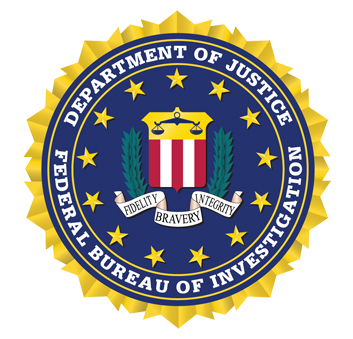

In [ ]:
#your code 
html = req.get(url).text
sopa = bs(html, 'html.parser')
sopa  # get error when using BS for parsing 

####  20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'

In [ ]:
#your code
html = req.get(url).text

sopa = bs(html, 'html.parser')

In [ ]:
sopa.find_all('table')

[<table><tr><th></th><th>Period</th><th>Magnitude</th><th class="moref">Depth</th><th class="moref">Latitude</th><th class="moref">Longitude</th>
 <th class="moref"></th><th class="moref">Reports</th><th class="moref">Images</th><th class="moref">Comments</th>
 </tr>
 <tr><td>Min: </td><td><input aria-label="date min" id="datemin" max="2024-03-04" min="2004-10-01" name="datemin" type="date"/></td><td><input aria-label="magnitude min" id="magmin" max="11" min="0" name="magmin" step="0.1" type="number"/></td><td><input aria-label="depth min" class="moref" id="depthmin" max="10000" min="-10" name="depthmin" step="1" type="number"/></td>
 <td><input aria-label="latitude min" class="moref" id="latmin" max="90" min="-90" name="latmin" step="0.001" type="number"/></td>
 <td class="ic"><input aria-label="longitude min" class="moref" id="lonmin" max="180" min="-180" name="lonmin" step="0.001" type="number"/></td>
 <td class="moref with"><div class="moref coords-icon" data-maploaded="false"></di

In [ ]:
tabla = sopa.find('table', {'class': 'eqs table-scroll'})

tabla

<table class="eqs table-scroll">
<thead><tr><th class="thico"><th class="citiz" colspan="2"><div>Citizen<br/>response</div><div><div class="dm comm"></div><div class="dm pic"></div></div></th>
</th><th class="tbdat">Date &amp; Time<div>UTC</div></th><th class="tblat">Lat.<div>degrees</div></th><th class="tblon">Lon.<div>degrees</div></th><th class="tbdep">Depth<div>km</div></th><th class="tbmag">Mag.<span>[+]</span></th><th class="tbreg">Region</th></tr></thead>
<tbody></tbody>
</table>

In [ ]:
driver = webdriver.Safari()

# Navegar a la página donde deseas guardar las cookies
driver.get('https://www.emsc-csem.org/Earthquake/')


cookies = driver.get_cookies()

# Cerrar el navegador
driver.quit()


In [ ]:
driver = webdriver.Safari()

# Navegar a la misma página o a otra donde desees cargar las cookies
driver.get('https://www.emsc-csem.org/Earthquake/')

for cookie in cookies:
    driver.add_cookie(cookie)


driver.quit()

In [ ]:
# code with Selenium 
url = 'https://www.emsc-csem.org/Earthquake/'
driver = webdriver.Safari()
driver.get(url)
tabla = driver.find_elements(By.TAG_NAME, 'table')[2]
cabeceras = tabla.find_element(By.TAG_NAME, 'thead')
cabeceras.text
cabeceras = [e.text for e in cabeceras.find_elements(By.TAG_NAME, 'th')]

cabeceras

['',
 'Citizenresponse',
 'Date & TimeUTC',
 'Lat.degrees',
 'Lon.degrees',
 'Depthkm',
 'Mag.[+]',
 'Region']

In [ ]:
cuerpo = tabla.find_element(By.TAG_NAME, 'tbody')
filas = cuerpo.find_elements(By.TAG_NAME, 'tr')
filas[0].text.split('\n')

['2024-03-04 14:26:4616 min ago46.0493.9195ML2.2FRANCE']

In [ ]:
filas[0].find_elements(By.TAG_NAME, 'td')

[<selenium.webdriver.remote.webelement.WebElement (session="E336C2E4-4FE1-4FD2-A340-075B91EF991C", element="node-34C51EF5-DB3C-49BF-9B72-A521B213904B")>,
 <selenium.webdriver.remote.webelement.WebElement (session="E336C2E4-4FE1-4FD2-A340-075B91EF991C", element="node-12F817C9-0440-4C90-8D15-025657D858A4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="E336C2E4-4FE1-4FD2-A340-075B91EF991C", element="node-7831B3CE-EB1F-40A8-AE17-637E03DAD175")>,
 <selenium.webdriver.remote.webelement.WebElement (session="E336C2E4-4FE1-4FD2-A340-075B91EF991C", element="node-FD82764D-EAAC-4F0F-A5E7-C754A01652DB")>,
 <selenium.webdriver.remote.webelement.WebElement (session="E336C2E4-4FE1-4FD2-A340-075B91EF991C", element="node-BE0A9E58-87DE-40EA-99CD-BCB44657F2E6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="E336C2E4-4FE1-4FD2-A340-075B91EF991C", element="node-447E6843-3AFC-40ED-99C4-D49E56E12E52")>,
 <selenium.webdriver.remote.webelement.WebElement (session="E336C2E4-4FE1-4F

In [ ]:
[e.text for e in filas[0].find_elements(By.TAG_NAME, 'td')]

['',
 '',
 '',
 '2024-03-04 14:26:4616 min ago',
 '46.049',
 '3.919',
 '5',
 'ML',
 '2.2',
 'FRANCE']

In [ ]:
len([e.text for e in filas[0].find_elements(By.TAG_NAME, 'td')])

10

In [ ]:
len(cabeceras)

8

In [ ]:
cabeceras = cabeceras[2:]

cabeceras

['Date & TimeUTC',
 'Lat.degrees',
 'Lon.degrees',
 'Depthkm',
 'Mag.[+]',
 'Region']

In [ ]:
len(cabeceras)

6

In [ ]:
f = [e.text for e in filas[0].find_elements(By.TAG_NAME, 'td')][2:7] + [e.text for e in filas[0].find_elements(By.TAG_NAME, 'td')][8:]

res = []


for e in f:
    
    if e!='':
        
        res.append(e)
        
res

['2024-03-04 14:26:4616 min ago', '46.049', '3.919', '5', '2.2', 'FRANCE']

In [ ]:
len(res)

6

In [ ]:
data = []

for f in filas:
    
    tmp = []
    
    d = [e.text for e in f.find_elements(By.TAG_NAME, 'td')][2:7] + [e.text for e in f.find_elements(By.TAG_NAME, 'td')][8:]

    for casilla in d:

        if casilla!='':

            tmp.append(casilla)

    data.append(tmp)
        

In [ ]:
import pandas as pd
df = pd.DataFrame(data, columns=cabeceras)

df.head()

,Date & TimeUTC,Lat.degrees,Lon.degrees,Depthkm,Mag.[+],Region
0,2024-03-04 14:26:4616 min ago,46.049,3.919,5,2.2,FRANCE
1,2024-03-04 14:23:1020 min ago,38.144,38.271,7,1.8,EASTERN TURKEY
2,2024-03-04 14:08:2235 min ago,38.227,38.264,7,2.2,EASTERN TURKEY
3,2024-03-04 14:05:1738 min ago,38.380,20.480,5,2.2,GREECE
4,2024-03-04 14:04:0239 min ago,40.291,27.008,7,1.6,WESTERN TURKEY


#### Count number of tweets by a given Twitter account.

You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account

In [82]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/POTUS'

In [83]:
driver = webdriver.Safari()

driver.get('https://twitter.com/POTUS')

# Wait for the page to load (you may need to adjust the time depending on the page)
driver.implicitly_wait(10)

# Find the table containing the earthquake information
tweets = driver.find_element(By.XPATH,'//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div/div/div/div/div/div[2]/div/div').text
print(tweets)

# Close the browser
driver.quit()

8,606 posts


In [84]:
type(tweets)

str

In [85]:
#your code
html = req.get(url).text

sopa = bs(html, 'html.parser')

In [86]:
sopa # error using beautiful soup

<!DOCTYPE html>

<html dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" name="viewport"/>
<style>
    body {
      -ms-overflow-style: scrollbar;
      overflow-y: scroll;
      overscroll-behavior-y: none;
    }

    .errorContainer {
      background-color: #FFF;
      color: #0F1419;
      max-width: 600px;
      margin: 0 auto;
      padding: 10%;
      font-family: Helvetica, sans-serif;
      font-size: 16px;
    }

    .errorButton {
      margin: 3em 0;
    }

    .errorButton a {
      background: #1DA1F2;
      border-radius: 2.5em;
      color: white;
      padding: 1em 2em;
      text-decoration: none;
    }

    .errorButton a:hover,
    .errorButton a:focus {
      background: rgb(26, 145, 218);
    }

    .errorFooter {
      color: #657786;
      font-size: 80%;
      line-height: 1.5;
      padding: 1em 0;
    }

    .errorFooter a,
    .errorFooter a:visited {
    

#### Number of followers of a given twitter account

You will need to include a ***try/except block*** in case account/s name not found. 
<br>***Hint:*** the program should count the followers for any provided account

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/POTUS'

In [ ]:
#your code
html = req.get(url).text
sopa = bs(html, 'html.parser')
sopa #error using bs

<!DOCTYPE html>

<html dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" name="viewport"/>
<style>
    body {
      -ms-overflow-style: scrollbar;
      overflow-y: scroll;
      overscroll-behavior-y: none;
    }

    .errorContainer {
      background-color: #FFF;
      color: #0F1419;
      max-width: 600px;
      margin: 0 auto;
      padding: 10%;
      font-family: Helvetica, sans-serif;
      font-size: 16px;
    }

    .errorButton {
      margin: 3em 0;
    }

    .errorButton a {
      background: #1DA1F2;
      border-radius: 2.5em;
      color: white;
      padding: 1em 2em;
      text-decoration: none;
    }

    .errorButton a:hover,
    .errorButton a:focus {
      background: rgb(26, 145, 218);
    }

    .errorFooter {
      color: #657786;
      font-size: 80%;
      line-height: 1.5;
      padding: 1em 0;
    }

    .errorFooter a,
    .errorFooter a:visited {
    

In [ ]:
driver = webdriver.Safari()

driver.get('https://twitter.com/POTUS')

# Wait for the page to load (you may need to adjust the time depending on the page)
driver.implicitly_wait(10)

# Find the table containing the earthquake information
followers = driver.find_elements(By.XPATH,'//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[3]/div/div/div/div/div[5]/div[2]/a/span[1]/span')
print(followers[0].text)

# Close the browser
driver.quit()

34.2M


#### List all language names and number of related articles in the order they appear in wikipedia.org

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/' 

In [ ]:
#your code
html = req.get(url).text

sopa = bs(html, 'html.parser')
sopa

<!DOCTYPE html>

<html class="no-js" lang="en">
<head>
<meta charset="utf-8"/>
<title>Wikipedia</title>
<meta content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation." name="description"/>
<script>
document.documentElement.className = document.documentElement.className.replace( /(^|\s)no-js(\s|$)/, "$1js-enabled$2" );
</script>
<meta content="initial-scale=1,user-scalable=yes" name="viewport"/>
<link href="/static/apple-touch/wikipedia.png" rel="apple-touch-icon"/>
<link href="/static/favicon/wikipedia.ico" rel="shortcut icon"/>
<link href="//creativecommons.org/licenses/by-sa/4.0/" rel="license"/>
<style>
.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-8bb90067.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-position:0 0;width:47px;height:47px}.svg-MediaWiki-logo_sister{background

In [ ]:
sopa.find_all('strong')

[<strong class="jsl10n localized-slogan" data-jsl10n="portal.slogan">The Free Encyclopedia</strong>,
 <strong>English</strong>,
 <strong>Ð ÑÑÑÐºÐ¸Ð¹</strong>,
 <strong>æ¥æ¬èª</strong>,
 <strong>EspaÃ±ol</strong>,
 <strong>Deutsch</strong>,
 <strong>FranÃ§ais</strong>,
 <strong>Italiano</strong>,
 <strong>ä¸­æ</strong>,
 <strong><bdi dir="rtl">ÙØ§Ø±Ø³Û</bdi></strong>,
 <strong><bdi dir="rtl">Ø§ÙØ¹Ø±Ø¨ÙØ©</bdi></strong>,
 <strong class="jsl10n" data-jsl10n="portal.app-links.title">
 <a class="jsl10n" data-jsl10n="portal.app-links.url" href="https://en.wikipedia.org/wiki/List_of_Wikipedia_mobile_applications">
 Download Wikipedia for Android or iOS
 </a>
 </strong>]

In [ ]:
sopa.find_all('strong')[0]

<strong class="jsl10n localized-slogan" data-jsl10n="portal.slogan">The Free Encyclopedia</strong>

In [ ]:
sopa.find_all('strong')[1].text

'English'

In [ ]:
sopa.find_all('strong')[1:-1] #quit the first and the last elements, these are not names of languages

[<strong>English</strong>,
 <strong>Ð ÑÑÑÐºÐ¸Ð¹</strong>,
 <strong>æ¥æ¬èª</strong>,
 <strong>EspaÃ±ol</strong>,
 <strong>Deutsch</strong>,
 <strong>FranÃ§ais</strong>,
 <strong>Italiano</strong>,
 <strong>ä¸­æ</strong>,
 <strong><bdi dir="rtl">ÙØ§Ø±Ø³Û</bdi></strong>,
 <strong><bdi dir="rtl">Ø§ÙØ¹Ø±Ø¨ÙØ©</bdi></strong>]

In [ ]:
len(sopa.find_all('strong')[1:-1]) #10 langiages in the list

10

In [ ]:
[e.text for e in sopa.find_all('strong')[1:-1]]

['English',
 'Ð\xa0Ñ\x83Ñ\x81Ñ\x81ÐºÐ¸Ð¹',
 'æ\x97¥æ\x9c¬èª\x9e',
 'EspaÃ±ol',
 'Deutsch',
 'FranÃ§ais',
 'Italiano',
 'ä¸\xadæ\x96\x87',
 'Ù\x81Ø§Ø±Ø³Û\x8c',
 'Ø§Ù\x84Ø¹Ø±Ø¨Ù\x8aØ©']

In [ ]:
sopa.find_all('small') # search for number of person speaking each language

[<small>6,782,000+ <span>articles</span></small>,
 <small>1Â 963Â 000+ <span>ÑÑÐ°ÑÐµÐ¹</span></small>,
 <small>1,403,000+ <span>è¨äº</span></small>,
 <small>1.930.000+ <span>artÃ­culos</span></small>,
 <small>2.881.000+ <span>Artikel</span></small>,
 <small>2â¯590â¯000+ <span>articles</span></small>,
 <small>1.847.000+ <span>voci</span></small>,
 <small>1,403,000+ <span>æ¡ç® / æ¢ç®</span></small>,
 <small>Û¹Û¹Û³Ù¬Û°Û°Û°+ <span>Ù
 ÙØ§ÙÙ</span></small>,
 <small>Ù¡Ù¬Ù¢Ù¢Ù§Ù¬Ù Ù Ù + <span>Ù
 ÙØ§ÙØ©</span></small>,
 <small class="jsl10n" data-jsl10n="license">This page is available under the <a href="https://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike License</a></small>,
 <small class="jsl10n" data-jsl10n="terms"><a href="https://meta.wikimedia.org/wiki/Terms_of_use">Terms of Use</a></small>,
 <small class="jsl10n" data-jsl10n="privacy-policy"><a href="https://meta.wikimedia.org/wiki/Privacy_policy">Privacy Policy</a></small>]

In [ ]:
len(sopa.find_all('small'))

13

In [ ]:
sopa.find_all('small')[:10]

[<small>6,782,000+ <span>articles</span></small>,
 <small>1Â 963Â 000+ <span>ÑÑÐ°ÑÐµÐ¹</span></small>,
 <small>1,403,000+ <span>è¨äº</span></small>,
 <small>1.930.000+ <span>artÃ­culos</span></small>,
 <small>2.881.000+ <span>Artikel</span></small>,
 <small>2â¯590â¯000+ <span>articles</span></small>,
 <small>1.847.000+ <span>voci</span></small>,
 <small>1,403,000+ <span>æ¡ç® / æ¢ç®</span></small>,
 <small>Û¹Û¹Û³Ù¬Û°Û°Û°+ <span>Ù
 ÙØ§ÙÙ</span></small>,
 <small>Ù¡Ù¬Ù¢Ù¢Ù§Ù¬Ù Ù Ù + <span>Ù
 ÙØ§ÙØ©</span></small>]

In [ ]:
[e.text for e in sopa.find_all('small')[:10]]

['6,782,000+ articles',
 '1Â\xa0963Â\xa0000+ Ñ\x81Ñ\x82Ð°Ñ\x82ÐµÐ¹',
 '1,403,000+ è¨\x98äº\x8b',
 '1.930.000+ artÃ\xadculos',
 '2.881.000+ Artikel',
 '2â\x80¯590â\x80¯000+ articles',
 '1.847.000+ voci',
 '1,403,000+ æ\x9d¡ç\x9b® / æ¢\x9dç\x9b®',
 'Û¹Û¹Û³Ù¬Û°Û°Û°+ Ù\x85Ù\x82Ø§Ù\x84Ù\x87',
 'Ù¡Ù¬Ù¢Ù¢Ù§Ù¬Ù\xa0Ù\xa0Ù\xa0+ Ù\x85Ù\x82Ø§Ù\x84Ø©']

In [ ]:
leng = [e.text for e in sopa.find_all('strong')[1:-1]]

num = [e.text for e in sopa.find_all('small')[:10]]


dict(zip(leng, num))

{'English': '6,782,000+ articles',
 'Ð\xa0Ñ\x83Ñ\x81Ñ\x81ÐºÐ¸Ð¹': '1Â\xa0963Â\xa0000+ Ñ\x81Ñ\x82Ð°Ñ\x82ÐµÐ¹',
 'æ\x97¥æ\x9c¬èª\x9e': '1,403,000+ è¨\x98äº\x8b',
 'EspaÃ±ol': '1.930.000+ artÃ\xadculos',
 'Deutsch': '2.881.000+ Artikel',
 'FranÃ§ais': '2â\x80¯590â\x80¯000+ articles',
 'Italiano': '1.847.000+ voci',
 'ä¸\xadæ\x96\x87': '1,403,000+ æ\x9d¡ç\x9b® / æ¢\x9dç\x9b®',
 'Ù\x81Ø§Ø±Ø³Û\x8c': 'Û¹Û¹Û³Ù¬Û°Û°Û°+ Ù\x85Ù\x82Ø§Ù\x84Ù\x87',
 'Ø§Ù\x84Ø¹Ø±Ø¨Ù\x8aØ©': 'Ù¡Ù¬Ù¢Ù¢Ù§Ù¬Ù\xa0Ù\xa0Ù\xa0+ Ù\x85Ù\x82Ø§Ù\x84Ø©'}

In [ ]:
url = 'https://www.wikipedia.org/'
driver.get(url)
caja = driver.find_element(By.XPATH, '//*[@id="www-wikipedia-org"]/main/nav[1]')

caja

<selenium.webdriver.remote.webelement.WebElement (session="E336C2E4-4FE1-4FD2-A340-075B91EF991C", element="node-F567B363-897C-4563-91CC-26542182891F")>

In [ ]:
idiomas = [e.text for e in caja.find_elements(By.TAG_NAME, 'strong')]

idiomas

['English',
 'Русский',
 'Español',
 '日本語',
 'Deutsch',
 'Français',
 'Italiano',
 '中文',
 'فارسی',
 'Português']

In [ ]:
articulos = [e.text for e in caja.find_elements(By.TAG_NAME, 'small')]

articulos

['6,790,000+ articles',
 '1\xa0966\xa0000+ статей',
 '1.935.000+ artículos',
 '1,405,000+ 記事',
 '2.887.000+ Artikel',
 '2\u202f595\u202f000+ articles',
 '1.850.000+ voci',
 '1,406,000+ 条目 / 條目',
 '۹۹۴٬۰۰۰+ مقاله',
 '1.119.000+ artigos']

In [ ]:
dict(zip(idiomas, articulos))

{'English': '6,790,000+ articles',
 'Русский': '1\xa0966\xa0000+ статей',
 'Español': '1.935.000+ artículos',
 '日本語': '1,405,000+ 記事',
 'Deutsch': '2.887.000+ Artikel',
 'Français': '2\u202f595\u202f000+ articles',
 'Italiano': '1.850.000+ voci',
 '中文': '1,406,000+ 条目 / 條目',
 'فارسی': '۹۹۴٬۰۰۰+ مقاله',
 'Português': '1.119.000+ artigos'}

#### A list with the different kind of datasets available in data.gov.uk 

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [ ]:
#your code 
html = req.get(url).text

sopa = bs(html, 'html.parser')

In [ ]:
sopa.find_all('a')

[<a class="govuk-link" href="/cookies">cookies to collect information</a>,
 <a class="govuk-link" href="/cookies">View cookies</a>,
 <a class="govuk-link" data-module="gem-track-click" data-track-action="Cookie banner settings clicked from confirmation" data-track-category="cookieBanner" href="/cookies">change your cookie settings</a>,
 <a class="gem-c-skip-link govuk-skip-link govuk-!-display-none-print" data-module="govuk-skip-link" href="#main-content">Skip to main content</a>,
 <a class="govuk-header__link govuk-header__link--homepage" href="/">
                 data.gov.uk | Find open data
               </a>,
 <a class="govuk-header__link" href="/publishers">Publish your data</a>,
 <a class="govuk-header__link" href="https://guidance.data.gov.uk/publish_and_manage_data/">Documentation</a>,
 <a class="govuk-header__link" href="/support">Support</a>,
 <a class="govuk-link" href="http://www.smartsurvey.co.uk/s/3SEXD/">feedback</a>,
 <a class="govuk-link" href="/search?filters%5Btopi

In [ ]:
sopa.find_all('a' , {'class' : 'govuk-link'})[4:]

[<a class="govuk-link" href="/search?filters%5Btopic%5D=Business+and+economy">Business and economy</a>,
 <a class="govuk-link" href="/search?filters%5Btopic%5D=Crime+and+justice">Crime and justice</a>,
 <a class="govuk-link" href="/search?filters%5Btopic%5D=Defence">Defence</a>,
 <a class="govuk-link" href="/search?filters%5Btopic%5D=Education">Education</a>,
 <a class="govuk-link" href="/search?filters%5Btopic%5D=Environment">Environment</a>,
 <a class="govuk-link" href="/search?filters%5Btopic%5D=Government">Government</a>,
 <a class="govuk-link" href="/search?filters%5Btopic%5D=Government+spending">Government spending</a>,
 <a class="govuk-link" href="/search?filters%5Btopic%5D=Health">Health</a>,
 <a class="govuk-link" href="/search?filters%5Btopic%5D=Mapping">Mapping</a>,
 <a class="govuk-link" href="/search?filters%5Btopic%5D=Society">Society</a>,
 <a class="govuk-link" href="/search?filters%5Btopic%5D=Towns+and+cities">Towns and cities</a>,
 <a class="govuk-link" href="/search?f

In [ ]:
[e.text for e in sopa.find_all('a' , {'class' : 'govuk-link'})[4:]]

['Business and economy',
 'Crime and justice',
 'Defence',
 'Education',
 'Environment',
 'Government',
 'Government spending',
 'Health',
 'Mapping',
 'Society',
 'Towns and cities',
 'Transport',
 'Digital service performance',
 'Government reference data']

In [ ]:
len([e.text for e in sopa.find_all('a' , {'class' : 'govuk-link'})[4:]]) # correct

14

#### Top 10 languages by number of native speakers stored in a Pandas Dataframe

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [ ]:
#your code
html = req.get(url).text

sopa = bs(html, 'html.parser')


In [ ]:
len(sopa.find_all('table'))

8

In [ ]:
table = sopa.find('table')

In [ ]:
table.find_all('th')

[<th>Language
 </th>,
 <th data-sort-type="number">Native speakers<br/><small>(in millions)</small>
 </th>,
 <th>Language family
 </th>,
 <th>Branch
 </th>]

In [ ]:
headers = [e.text.strip() for e in table.find_all('th')]
headers

['Language', 'Native speakers(in millions)', 'Language family', 'Branch']

In [ ]:
rows = table.find_all('tr')[1:]
rows

[<tr>
 <td><a class="mw-redirect" href="/wiki/ISO_639:cmn" title="ISO 639:cmn">Mandarin Chinese</a>
 </td>
 <td>941
 </td>
 <td><a href="/wiki/Sino-Tibetan_languages" title="Sino-Tibetan languages">Sino-Tibetan</a>
 </td>
 <td><a href="/wiki/Sinitic_languages" title="Sinitic languages">Sinitic</a>
 </td></tr>,
 <tr>
 <td><a class="mw-redirect" href="/wiki/ISO_639:spa" title="ISO 639:spa">Spanish</a>
 </td>
 <td>486
 </td>
 <td><a href="/wiki/Indo-European_languages" title="Indo-European languages">Indo-European</a>
 </td>
 <td><a href="/wiki/Romance_languages" title="Romance languages">Romance</a>
 </td></tr>,
 <tr>
 <td><a class="mw-redirect" href="/wiki/ISO_639:eng" title="ISO 639:eng">English</a>
 </td>
 <td>380
 </td>
 <td><a href="/wiki/Indo-European_languages" title="Indo-European languages">Indo-European</a>
 </td>
 <td><a href="/wiki/Germanic_languages" title="Germanic languages">Germanic</a>
 </td></tr>,
 <tr>
 <td><a class="mw-redirect" href="/wiki/ISO_639:hin" title="ISO 639

In [ ]:
[e.text.strip() for e in rows[0].find_all('td')]


['Mandarin Chinese', '941', 'Sino-Tibetan', 'Sinitic']

In [ ]:
data = []

for r in rows:
    d = [e.text.strip() for e in r.find_all('td')]
    data.append(d)

data

[['Mandarin Chinese', '941', 'Sino-Tibetan', 'Sinitic'],
 ['Spanish', '486', 'Indo-European', 'Romance'],
 ['English', '380', 'Indo-European', 'Germanic'],
 ['Hindi', '345', 'Indo-European', 'Indo-Aryan'],
 ['Bengali', '237', 'Indo-European', 'Indo-Aryan'],
 ['Portuguese', '236', 'Indo-European', 'Romance'],
 ['Russian', '148', 'Indo-European', 'Balto-Slavic'],
 ['Japanese', '123', 'Japonic', 'Japanese'],
 ['Yue Chinese', '86', 'Sino-Tibetan', 'Sinitic'],
 ['Vietnamese', '85', 'Austroasiatic', 'Vietic'],
 ['Turkish', '84', 'Turkic', 'Oghuz'],
 ['Wu Chinese', '83', 'Sino-Tibetan', 'Sinitic'],
 ['Marathi', '83', 'Indo-European', 'Indo-Aryan'],
 ['Telugu', '83', 'Dravidian', 'South-Central'],
 ['Western Punjabi', '82', 'Indo-European', 'Indo-Aryan'],
 ['Korean', '81', 'Koreanic', '—'],
 ['Tamil', '79', 'Dravidian', 'South'],
 ['Egyptian Arabic', '78', 'Afroasiatic', 'Semitic'],
 ['Standard German', '76', 'Indo-European', 'Germanic'],
 ['French', '74', 'Indo-European', 'Romance'],
 ['Urdu'

In [ ]:
data = [[e.text.strip() for e in r.find_all('td')] for r in rows]
data

[['Mandarin Chinese', '941', 'Sino-Tibetan', 'Sinitic'],
 ['Spanish', '486', 'Indo-European', 'Romance'],
 ['English', '380', 'Indo-European', 'Germanic'],
 ['Hindi', '345', 'Indo-European', 'Indo-Aryan'],
 ['Bengali', '237', 'Indo-European', 'Indo-Aryan'],
 ['Portuguese', '236', 'Indo-European', 'Romance'],
 ['Russian', '148', 'Indo-European', 'Balto-Slavic'],
 ['Japanese', '123', 'Japonic', 'Japanese'],
 ['Yue Chinese', '86', 'Sino-Tibetan', 'Sinitic'],
 ['Vietnamese', '85', 'Austroasiatic', 'Vietic'],
 ['Turkish', '84', 'Turkic', 'Oghuz'],
 ['Wu Chinese', '83', 'Sino-Tibetan', 'Sinitic'],
 ['Marathi', '83', 'Indo-European', 'Indo-Aryan'],
 ['Telugu', '83', 'Dravidian', 'South-Central'],
 ['Western Punjabi', '82', 'Indo-European', 'Indo-Aryan'],
 ['Korean', '81', 'Koreanic', '—'],
 ['Tamil', '79', 'Dravidian', 'South'],
 ['Egyptian Arabic', '78', 'Afroasiatic', 'Semitic'],
 ['Standard German', '76', 'Indo-European', 'Germanic'],
 ['French', '74', 'Indo-European', 'Romance'],
 ['Urdu'

In [ ]:
import pandas as pd
df = pd.DataFrame(data, columns = headers)
df

,Language,Native speakers(in millions),Language family,Branch
0,Mandarin Chinese,941,Sino-Tibetan,Sinitic
1,Spanish,486,Indo-European,Romance
2,English,380,Indo-European,Germanic
3,Hindi,345,Indo-European,Indo-Aryan
4,Bengali,237,Indo-European,Indo-Aryan
5,Portuguese,236,Indo-European,Romance
6,Russian,148,Indo-European,Balto-Slavic
7,Japanese,123,Japonic,Japanese
8,Yue Chinese,86,Sino-Tibetan,Sinitic
9,Vietnamese,85,Austroasiatic,Vietic


### BONUS QUESTIONS

#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/JoeBiden/'

In [ ]:
# your code
html = req.get(url).text
sopa = bs(html , 'html.parser')
sopa #error 

<!DOCTYPE html>

<html dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" name="viewport"/>
<style>
    body {
      -ms-overflow-style: scrollbar;
      overflow-y: scroll;
      overscroll-behavior-y: none;
    }

    .errorContainer {
      background-color: #FFF;
      color: #0F1419;
      max-width: 600px;
      margin: 0 auto;
      padding: 10%;
      font-family: Helvetica, sans-serif;
      font-size: 16px;
    }

    .errorButton {
      margin: 3em 0;
    }

    .errorButton a {
      background: #1DA1F2;
      border-radius: 2.5em;
      color: white;
      padding: 1em 2em;
      text-decoration: none;
    }

    .errorButton a:hover,
    .errorButton a:focus {
      background: rgb(26, 145, 218);
    }

    .errorFooter {
      color: #657786;
      font-size: 80%;
      line-height: 1.5;
      padding: 1em 0;
    }

    .errorFooter a,
    .errorFooter a:visited {
    

In [ ]:
driver = webdriver.Safari()


driver.get('https://twitter.com/JoeBiden/')


driver.implicitly_wait(10)

# Encontrar el elemento que contiene el texto del tweet utilizando XPath
tweet_element = driver.find_element(By.XPATH, '//div[@data-testid="tweet"]//div[@lang="es"]/span')


tweet_text = tweet_element.text

print(tweet_text)

driver.quit()

In [92]:
driver = webdriver.Safari()

driver.get('https://twitter.com/JoeBiden/')

# Wait for the page to load (you may need to adjust the time depending on the page)
driver.implicitly_wait(10)

# Find the table containing the earthquake information
article = driver.find_element(By.XPATH,'/div/div/div[2]/main/div/div/div/div[1]/div/div[3]/div/div/section/div/div/div[6]/div/div/article/div/div/div[2]/div[2]/div[2]').text
# #id__hlio71vzis4 
# 

# Close the browser
driver.quit()

ProtocolError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

#### IMDB's Top 250 data (movie name, Initial release, director name and stars) as a pandas dataframe

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code
html = req.get(url).text
sopa = bs(html, 'html.parser')
sopa #error

<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>

In [94]:
driver = webdriver.Safari()

driver.get('https://www.imdb.com/chart/top')

driver.implicitly_wait(10)

pelis = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div/div[3]/section/div/div[2]/div/ul')

pelis

<selenium.webdriver.remote.webelement.WebElement (session="3AFE52A5-5774-4BA0-A4D8-0AAD2C4B0564", element="node-1359B51C-9FF6-4039-92E7-8DDF53209D7C")>

In [95]:
pel = pelis.find_elements(By.TAG_NAME,'li')

In [96]:
len(pel)

250

In [ ]:
pel[0].text.split('\n')

In [106]:
df = pd.DataFrame([e.text.split('\n') for e in pel])

In [ ]:
df.head()

#### Movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'https://www.imdb.com/chart/top'



In [ ]:
#your code
html = req.get(url).text
sopa = bs(html, 'html.parser')
sopa #error

<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>

In [ ]:
driver = webdriver.Safari()

driver.get('https://www.imdb.com/chart/top')

driver.implicitly_wait(10)

xpath = '//*[@id="list-view-option-detailed"]'

driver.find_element(By.XPATH, xpath).click()


In [ ]:
pelis = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div/div[3]/section/div/div[2]/div/ul')

pelis

In [ ]:
pel = pelis.find_elements(By.TAG_NAME,'li')

In [ ]:
len(pel)

In [ ]:
pel[0].text.split('\n')

In [ ]:
nombre = pel[0].find_element(By.TAG_NAME, 'h3').text
nombre

In [ ]:
año = pel[0].find_elements(By.TAG_NAME, 'span')[1].text
año

In [ ]:
dur = pel[0].find_elements(By.TAG_NAME, 'span')[2].text
dur

In [ ]:
edad = pel[0].find_elements(By.TAG_NAME, 'span')[3].text
edad

In [ ]:
est = pel[0].find_elements(By.TAG_NAME, 'span')[4].text
est.split('\n')

In [ ]:
reco = est.split('\n')[0]
reco

In [ ]:
usuarios = est.split('\n')[1].strip().replace('(', '').replace(')', '')
usuarios

In [ ]:
desc = pel[0].find_element(By.CSS_SELECTOR, 'div.ipc-html-content-inner-div').text
desc

In [ ]:
director = pel[0].find_element(By.CSS_SELECTOR, 'a.ipc-link.ipc-link--base.dli-director-item').text
director

In [ ]:
pel[0].find_elements(By.TAG_NAME, 'span')[11].text

In [ ]:
estrellas = [e.text for e in pel[0].find_elements(By.TAG_NAME, 'span')[11:]][:-1]

estrellas

In [ ]:
votos = pel[0].find_element(By.CSS_SELECTOR, 'div.sc-f24f1c5c-0.cPpOqU').text[5:]

votos

In [ ]:
len(pel)

In [ ]:
  
data = []

for p in pel:
    
    est = p.find_elements(By.TAG_NAME, 'span')[4].text   
    dictio = {'nombre': p.find_element(By.TAG_NAME, 'h3').text,
              'año': p.find_elements(By.TAG_NAME, 'span')[1].text,
              'duracion': p.find_elements(By.TAG_NAME, 'span')[2].text,
              'edad': p.find_elements(By.TAG_NAME, 'span')[3].text,
              'reco': est.split('\n')[0],
              'usuarios': est.split('\n')[1].strip().replace('(', '').replace(')', ''),
              'desc': p.find_element(By.CSS_SELECTOR, 'div.ipc-html-content-inner-div').text,
              'director': p.find_element(By.CSS_SELECTOR, 'a.ipc-link.ipc-link--base.dli-director-item').text,
              'estrellas': '-'.join([e.text for e in p.find_elements(By.TAG_NAME, 'span')[11:]][:-1]),
              'votos': p.find_element(By.CSS_SELECTOR, 'div.sc-f24f1c5c-0.cPpOqU').text[5:]

             }
    
    
    data.append(dictio)

In [ ]:
df = pd.DataFrame(data)

df.head()

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = city=input('Enter the city:')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'


In [ ]:
# your code
html = req.get(url).text
sopa = bs(html, 'html.parser') #error

/var/folders/_b/rxv_4dvx5s7bhhpl1mcf4xgw0000gn/T/ipykernel_5570/3130366686.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sopa = bs(html, 'html.parser') #error


In [123]:
safari_options = webdriver.SafariOptions()

In [ ]:
safari_options.add_argument('--allow-running-insecure-content')
safari_options.add_argument('--disable-gpu')
safari_options.add_argument('--headless')


driver = webdriver.Safari(options=safari_options)

city = input('Enter the city:')
url = 'http://api.openweathermap.org/data/2.5/weather?' + 'q=' + city + '&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'


driver.get(url)

weather_info_element = driver.find_element_by_tag_name('pre')

weather_info = weather_info_element.text
print(weather_info)

driver.quit()

#### Book name,price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
#your code
html = req.get(url).text
sopa = bs(html, 'html.parser')

In [ ]:
sopa.find_all('li',{'class': 'col-xs-6 col-sm-4 col-md-3 col-lg-3'})

[<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>
 </li>,
 <li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
 <div class="image

In [ ]:
books = sopa.find_all('li', {'class': 'col-xs-6 col-sm-4 col-md-3 col-lg-3'})
books

[<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>
 </li>,
 <li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
 <div class="image

In [ ]:
books[0].find_all('a')[1].attrs['href'] 

url + books[0].find_all('a')[1].attrs['href'] #book url

'http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'

In [ ]:
books[0].find('a').find('img').attrs['alt'] #name of a book

'A Light in the Attic'

In [ ]:
books[0].find('p' , {'class': 'price_color'}).text # price

'Â£51.77'

In [ ]:
books[0].find('p', {'class': 'instock availability'}).text.strip() #stock availability

'In stock'

In [ ]:
data = []

for b in books:

    dictio = {'name':b.find('a').find('img').attrs['alt'],
              'price' : float(b.find('p' , {'class': 'price_color'}).text[2:]),
              'stock' : b.find('p', {'class': 'instock availability'}).text.strip(),
              'url' : url + b.find_all('a')[1].attrs['href']} 
    
    data.append(dictio)

data    

[{'name': 'A Light in the Attic',
  'price': 51.77,
  'stock': 'In stock',
  'url': 'http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'},
 {'name': 'Tipping the Velvet',
  'price': 53.74,
  'stock': 'In stock',
  'url': 'http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html'},
 {'name': 'Soumission',
  'price': 50.1,
  'stock': 'In stock',
  'url': 'http://books.toscrape.com/catalogue/soumission_998/index.html'},
 {'name': 'Sharp Objects',
  'price': 47.82,
  'stock': 'In stock',
  'url': 'http://books.toscrape.com/catalogue/sharp-objects_997/index.html'},
 {'name': 'Sapiens: A Brief History of Humankind',
  'price': 54.23,
  'stock': 'In stock',
  'url': 'http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html'},
 {'name': 'The Requiem Red',
  'price': 22.65,
  'stock': 'In stock',
  'url': 'http://books.toscrape.com/catalogue/the-requiem-red_995/index.html'},
 {'name': 'The Dirty Little Secrets of Getting Your Dre

In [ ]:
df = pd.DataFrame(data)
df

,name,price,stock,url
0,A Light in the Attic,51.77,In stock,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,53.74,In stock,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,50.10,In stock,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,47.82,In stock,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,54.23,In stock,http://books.toscrape.com/catalogue/sapiens-a-...
5,The Requiem Red,22.65,In stock,http://books.toscrape.com/catalogue/the-requie...
6,The Dirty Little Secrets of Getting Your Dream...,33.34,In stock,http://books.toscrape.com/catalogue/the-dirty-...
7,The Coming Woman: A Novel Based on the Life of...,17.93,In stock,http://books.toscrape.com/catalogue/the-coming...
8,The Boys in the Boat: Nine Americans and Their...,22.60,In stock,http://books.toscrape.com/catalogue/the-boys-i...
9,The Black Maria,52.15,In stock,http://books.toscrape.com/catalogue/the-black-...
